In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
aquaculture_quantity_value = pd.read_csv("../data/Aquaculture_Quantity_Code_Merged.csv", 
                                         usecols = ['PERIOD', 'Quantity', 'Country', 'WaterArea', 'Species', 'Scientific_Name', 'Environment'])
aquaculture_quantity_value.rename(columns={'Quantity': 'Tonnes'}, inplace=True)
print(aquaculture_quantity_value.shape)

(96571, 7)


In [3]:
population_by_country = pd.read_csv("../data/Population_by_Country.csv")
print(population_by_country.shape)

(235, 2)


In [4]:
aquaculture_quantity_value = pd.merge(aquaculture_quantity_value, population_by_country)
aquaculture_quantity_value['Population'] = aquaculture_quantity_value['Population'] / 1000000
aquaculture_quantity_value.rename(columns = {'Population': 'Population (millions)'}, inplace = True)
aquaculture_quantity_value.head()

,PERIOD,Tonnes,Country,WaterArea,Environment,Species,Scientific_Name,Population (millions)
0,2020,8000.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38.928346
1,2019,7950.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38.928346
2,2018,7900.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38.928346
3,2017,6950.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38.928346
4,2016,6100.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38.928346


In [5]:
aquaculture_quantity_value['Tonnes_Per_Million_People'] = aquaculture_quantity_value['Tonnes']  / aquaculture_quantity_value['Population (millions)']
aquaculture_quantity_value.head()

,PERIOD,Tonnes,Country,WaterArea,Environment,Species,Scientific_Name,Population (millions),Tonnes_Per_Million_People
0,2020,8000.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38.928346,205.505777
1,2019,7950.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38.928346,204.221366
2,2018,7900.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38.928346,202.936955
3,2017,6950.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38.928346,178.533144
4,2016,6100.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38.928346,156.698155


In [11]:
africa_freshwater = aquaculture_quantity_value.loc[(aquaculture_quantity_value['WaterArea'] == 'Africa - Inland waters') & 
                                               (aquaculture_quantity_value['Environment'] == 'Freshwater') &
                                               (aquaculture_quantity_value['Country'] != 'Spain')]
africa_freshwater.head()

,PERIOD,Tonnes,Country,WaterArea,Environment,Species,Scientific_Name,Population (millions),Tonnes_Per_Million_People
13543,2014,799.960,Algeria,Africa - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,43.851044,18.242667
13544,2013,1116.670,Algeria,Africa - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,43.851044,25.465072
13545,2012,1460.210,Algeria,Africa - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,43.851044,33.299321
13546,2011,1210.440,Algeria,Africa - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,43.851044,27.603448
13547,2010,716.779,Algeria,Africa - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,43.851044,16.345768


In [12]:
africa_freshwater = africa_freshwater.drop(['WaterArea', 'Environment'], axis = 1)
africa_freshwater.head()

,PERIOD,Tonnes,Country,Species,Scientific_Name,Population (millions),Tonnes_Per_Million_People
13543,2014,799.960,Algeria,Cyprinids nei,Cyprinidae,43.851044,18.242667
13544,2013,1116.670,Algeria,Cyprinids nei,Cyprinidae,43.851044,25.465072
13545,2012,1460.210,Algeria,Cyprinids nei,Cyprinidae,43.851044,33.299321
13546,2011,1210.440,Algeria,Cyprinids nei,Cyprinidae,43.851044,27.603448
13547,2010,716.779,Algeria,Cyprinids nei,Cyprinidae,43.851044,16.345768


So what fish species are the most farmed in freshwater in africa?

In [14]:
most_farmed_species = africa_freshwater.groupby('Species', as_index=False)['Tonnes'].sum().sort_values(by = 'Tonnes')

In [15]:
top_six = most_farmed_species.tail(6)['Species']

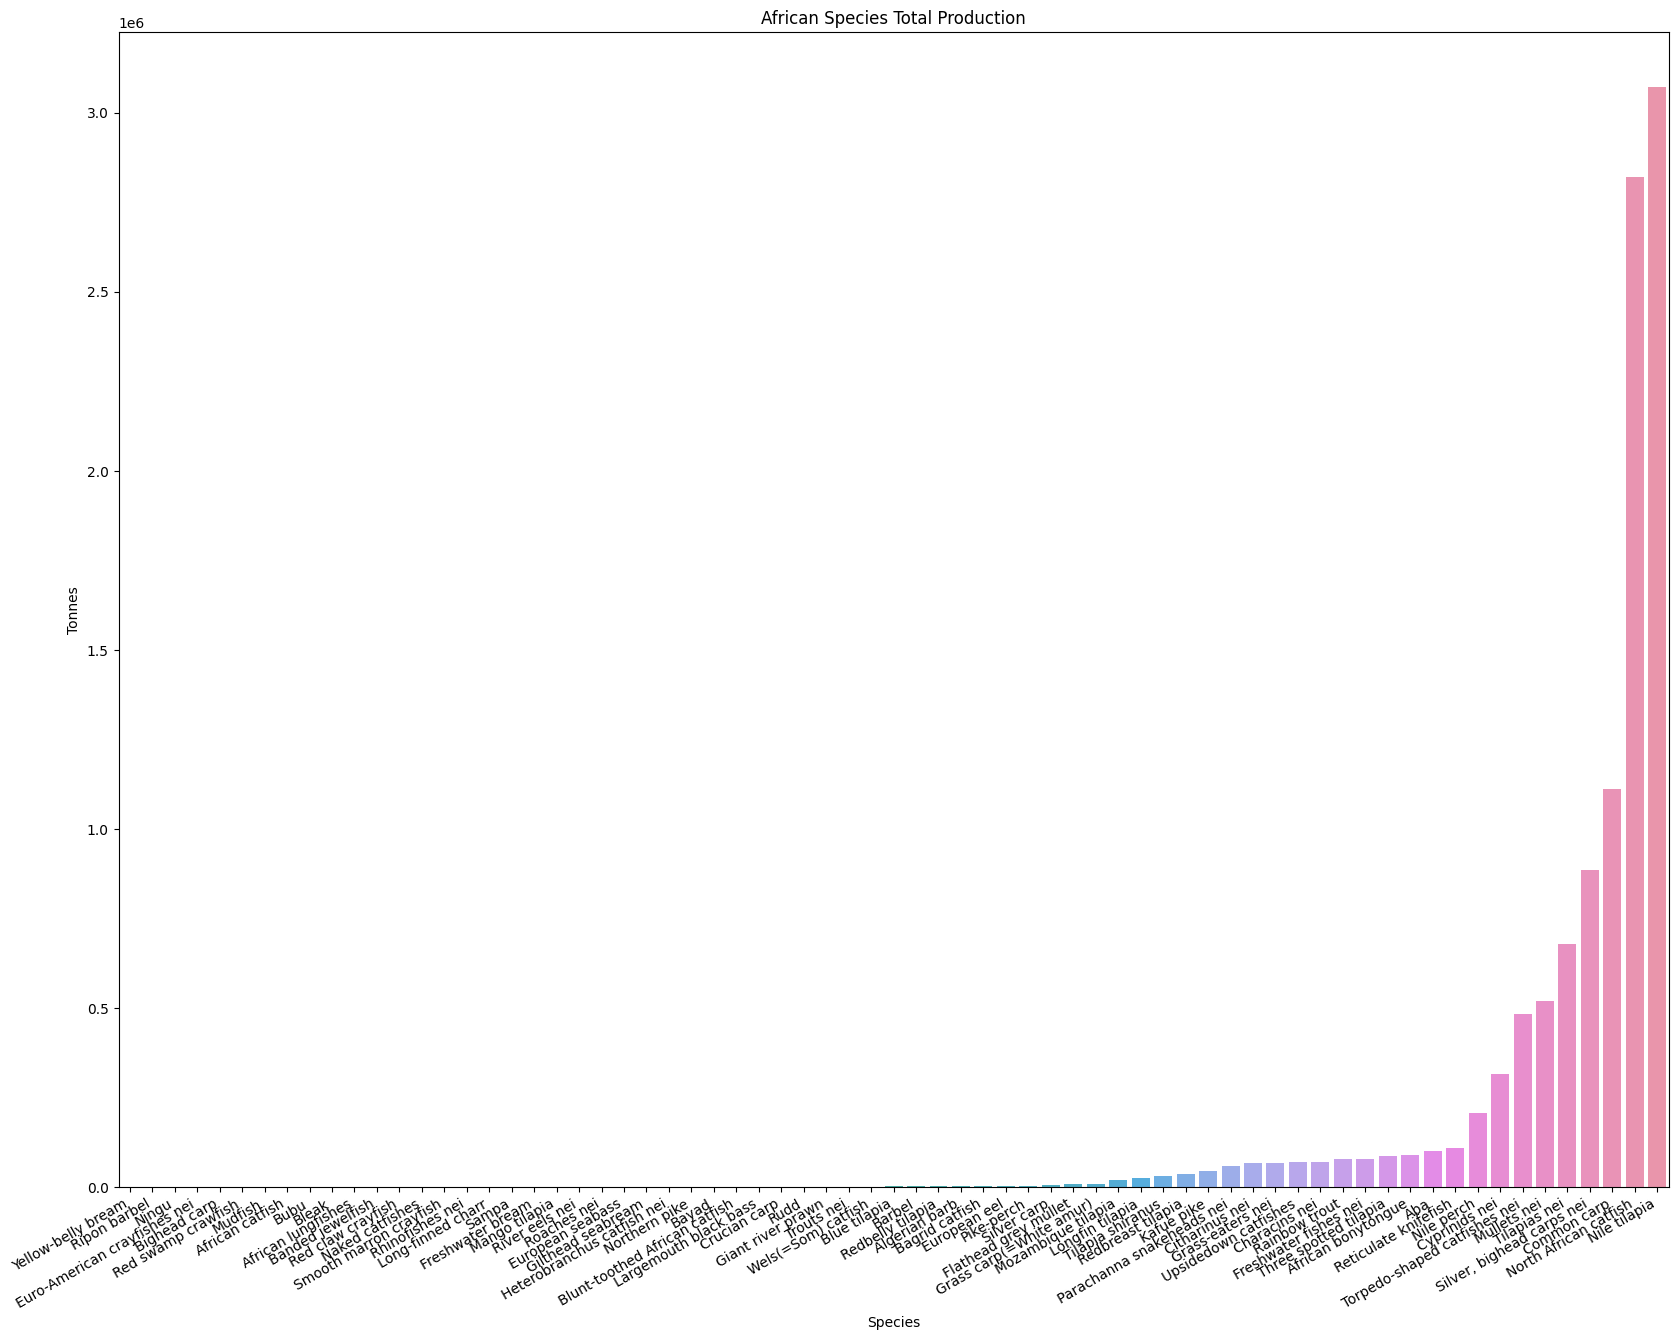

In [30]:
plt.figure(figsize=(20,15))
g = sns.barplot(data=most_farmed_species, x = 'Species', y = 'Tonnes')
g.set(title = 'African Species Total Production')
g.set_xticklabels(g.get_xticklabels(), rotation=30, horizontalalignment='right');

Focus on South Africa, Uganda, Nigeria, Egypt, Ghana and the 6 top species

In [35]:
countries_top_species = (africa_freshwater[africa_freshwater['Country']
                   .isin(['Nigeria', 'South Africa', 'Uganda', 'Zambia', 'Ghana']) &
                   (africa_freshwater['Species'].isin(top_six))]
)

In [36]:
countries_top_species.head()

,PERIOD,Tonnes,Country,Species,Scientific_Name,Population (millions),Tonnes_Per_Million_People
15021,1995,4220.0,Nigeria,Tilapias nei,Oreochromis spp,206.139589,20.471565
15022,1994,3700.0,Nigeria,Tilapias nei,Oreochromis spp,206.139589,17.949003
15023,1993,5000.0,Nigeria,Tilapias nei,Oreochromis spp,206.139589,24.255409
15024,1983,3075.0,Nigeria,Tilapias nei,Oreochromis spp,206.139589,14.917076
15025,1982,3006.0,Nigeria,Tilapias nei,Oreochromis spp,206.139589,14.582352


In [37]:
grouped_countries_top_species = (countries_top_species
                                 .groupby(['Country', 'Species', 'PERIOD'], as_index = False)['Tonnes_Per_Million_People']
                                 .sum())

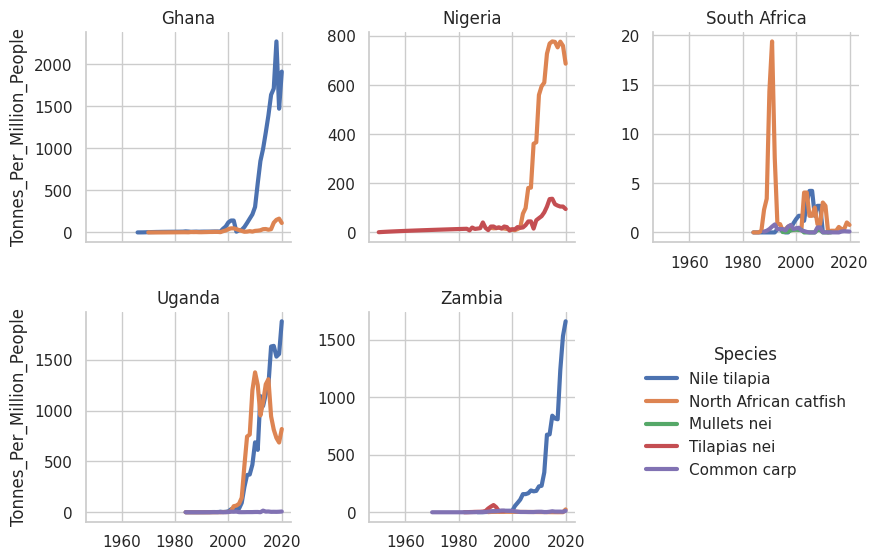

In [38]:
sns.set_theme(style = "whitegrid")
g = sns.FacetGrid(grouped_countries_top_species, col = "Country", hue = 'Species', 
                  sharey = False, margin_titles = True, col_wrap = 3)
g.set_titles(col_template = '{col_name}')
g.map(sns.lineplot, 'PERIOD', 'Tonnes_Per_Million_People', linewidth = 3)
g.add_legend(bbox_to_anchor=(0.8, 0.3))
g.set(xlabel = None);